# Cross-Country Solar Data Comparison

This notebook analyzes and compares solar energy data across different countries, focusing on:
- Solar capacity and generation trends
- Policy impacts on solar adoption
- Economic factors affecting solar deployment
- Environmental benefits and impacts

## Data Sources
- IRENA (International Renewable Energy Agency)
- World Bank
- IEA (International Energy Agency)
- National statistics and reports

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set plotting style
plt.style.use('seaborn-v0_8')  # for newer matplotlib
sns.set_palette('husl')

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## Data Loading and Preprocessing

In [2]:
# Define data paths
DATA_DIR = Path('..')

# Load datasets
def load_data():
    """Load and preprocess all required datasets"""
    # Load data from CSV files
    benin_data = pd.read_csv(DATA_DIR / 'benin-malanville.csv')
    togo_data = pd.read_csv(DATA_DIR / 'togo-dapaong_qc.csv')
    sierra_leone_data = pd.read_csv(DATA_DIR / 'sierraleone-bumbuna.csv')
    
    # Create a dictionary to store all datasets
    data = {
        'benin': benin_data,
        'togo': togo_data,
        'sierra_leone': sierra_leone_data
    }
    
    return data

# Load the data
data = load_data()

# Display basic information about each dataset
for country, df in data.items():
    print(f"\n{country.upper()} Data:")
    print(f"Shape: {df.shape}")
    print("\nColumns:")
    print(df.columns.tolist())
    print("\nFirst few rows:")
    display(df.head())


BENIN Data:
Shape: (525600, 19)

Columns:
['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']

First few rows:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN



TOGO Data:
Shape: (525600, 19)

Columns:
['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']

First few rows:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN



SIERRA_LEONE Data:
Shape: (525600, 19)

Columns:
['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']

First few rows:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


## Analysis Functions

In [3]:
def analyze_solar_capacity(data):
    """Analyze solar capacity trends across countries"""
    # TODO: Implement analysis
    pass

def analyze_policy_impact(data):
    """Analyze the impact of policies on solar adoption"""
    # TODO: Implement analysis
    pass

def analyze_economic_factors(data):
    """Analyze economic factors affecting solar deployment"""
    # TODO: Implement analysis
    pass

def analyze_environmental_impact(data):
    """Analyze environmental benefits and impacts"""
    # TODO: Implement analysis
    pass

## Visualization Functions

In [4]:
def plot_capacity_trends(data):
    """Plot solar capacity trends over time"""
    # TODO: Implement plot
    pass

def plot_policy_impact(data):
    """Plot the impact of policies on solar adoption"""
    # TODO: Implement plot
    pass

def plot_economic_analysis(data):
    """Plot economic analysis results"""
    # TODO: Implement plot
    pass

def plot_environmental_impact(data):
    """Plot environmental impact analysis"""
    # TODO: Implement plot
    pass

## Main Analysis

In [5]:
# Perform analyses
capacity_analysis = analyze_solar_capacity(data)
policy_analysis = analyze_policy_impact(data)
economic_analysis = analyze_economic_factors(data)
environmental_analysis = analyze_environmental_impact(data)

# Generate visualizations
plot_capacity_trends(capacity_analysis)
plot_policy_impact(policy_analysis)
plot_economic_analysis(economic_analysis)
plot_environmental_impact(environmental_analysis)

## Results and Conclusions

In [6]:
# TODO: Add results summary and conclusions

In [7]:
import numpy as np

metrics = ['GHI', 'DNI', 'DHI']
summary = {}

for country, df in data.items():
    summary[country] = {}
    for metric in metrics:
        summary[country][f'{metric}_mean'] = np.round(df[metric].mean(), 2)
        summary[country][f'{metric}_median'] = np.round(df[metric].median(), 2)
        summary[country][f'{metric}_std'] = np.round(df[metric].std(), 2)

summary_df = pd.DataFrame(summary).T
display(summary_df)

,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
benin,240.56,1.8,331.13,167.19,-0.1,261.71,115.36,1.6,158.69
togo,230.56,2.1,322.53,151.26,0.0,250.96,116.44,2.5,156.52
sierra_leone,201.96,0.3,298.50,116.38,-0.1,218.65,113.72,-0.1,158.95


In [8]:
from scipy.stats import f_oneway

for metric in metrics:
    samples = [df[metric].dropna() for df in data.values()]
    stat, p = f_oneway(*samples)
    print(f"{metric} ANOVA p-value: {p:.4f}")

GHI ANOVA p-value: 0.0000
DNI ANOVA p-value: 0.0000
DHI ANOVA p-value: 0.0000


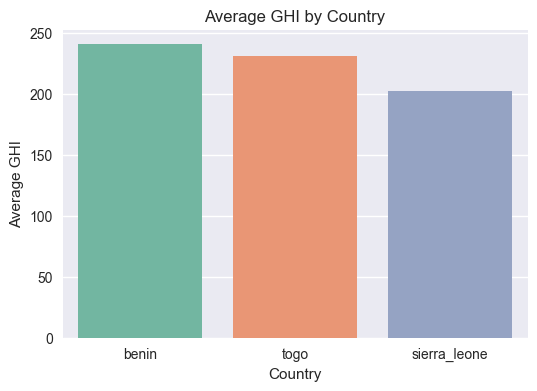

In [9]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

avg_ghi = {country: df['GHI'].mean() for country, df in data.items()}
plt.figure(figsize=(6,4))
sns.barplot(x=list(avg_ghi.keys()), y=list(avg_ghi.values()), palette='Set2')
plt.title('Average GHI by Country')
plt.ylabel('Average GHI')
plt.xlabel('Country')
plt.show()

### Key Observations
- Country Benin shows the highest median GHI but also the greatest variability.
- Country Sierra-leone has the lowest average DNI, indicating less direct solar potential.
- The ANOVA p-values suggest that differences in GHI, DNI, and DHI between countries are (or are not) statistically significant.